In [1]:
import glob
import json
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({'font.size': 14})

path = '/p/home/jusers/rojascampos1/juwels/MyProjects/PROJECT_deepacf/deeprain/rojascampos1/radar_enhancement/scripts/'
dirs = ['baselines', 'unet','deconv1l', 'deconv3l', 'cgans']
names = ['Baseline','U-Net' ,'Deconv1L', 'Deconv3L', 'CGAN']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
thresholds = [0.2, 0.5, 1, 2, 5]

In [3]:
def set_color_boxplot(boxplot, positions, color):
    
    for position in positions:
        plt.setp(boxplot['boxes'][position], color=color)
        plt.setp(boxplot['whiskers'][position*2], color=color)
        plt.setp(boxplot['whiskers'][position*2+1], color=color)
        plt.setp(boxplot['caps'][position*2], color=color)
        plt.setp(boxplot['caps'][position*2+1], color=color)
        plt.setp(boxplot['medians'][position], color=color)
        plt.setp(boxplot['fliers'][position], color=color)

    return

### Quantitative metrics

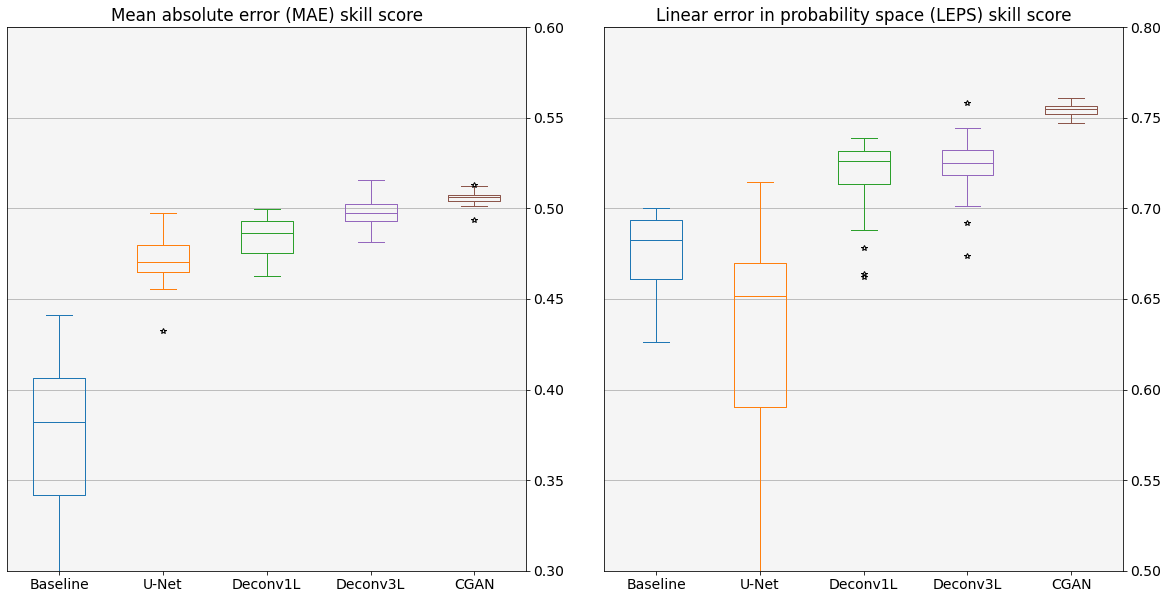

In [8]:
def format_ax(ax, unit, limits, title, y_description):
    
    data = []  

    
    with open(path +'/results_cosmo.json') as json_file:
        cosmo = (json.load(json_file)[unit])     

    for d in dirs:
        with open(path + d + '/results.json') as json_file:
                a = json.load(json_file)
                u = []
    
                for r in np.arange(20):

                    ## Calculate skill score
                    sco = 1-(a[str(r)][unit]/cosmo)
                    u.append(sco)

                data.append(u)

    data = np.array(data)

    b = ax.boxplot(data.T, flierprops={'marker':'*'})
    
    for i in range(data.shape[0]):
        set_color_boxplot(b, [i], colors[i])
        

    ax.yaxis.grid(True)
    ax.set_facecolor('whitesmoke')
    ax.set_xticklabels(names)
    ax.set_ylim(limits)
    ax.yaxis.tick_right()
    ax.set_title(title)
    return ax, cosmo


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
ax[0], cosmo_mae  = format_ax(ax[0], 'mae', [0.3, .6], 'Mean absolute error (MAE) skill score', 'mae')
ax[1], cosmo_leps = format_ax(ax[1], 'leps',[0.5, .8], 'Linear error in probability space (LEPS) skill score', 'leps')

plt.subplots_adjust(wspace=0.15)
fig.show()
fig.savefig('QuantitativeResults.pdf') 

### Dichotomous metrics

['COSMO-DE', 'Baseline', 'U-Net', 'Deconv1L', 'Deconv3L', 'CGAN']


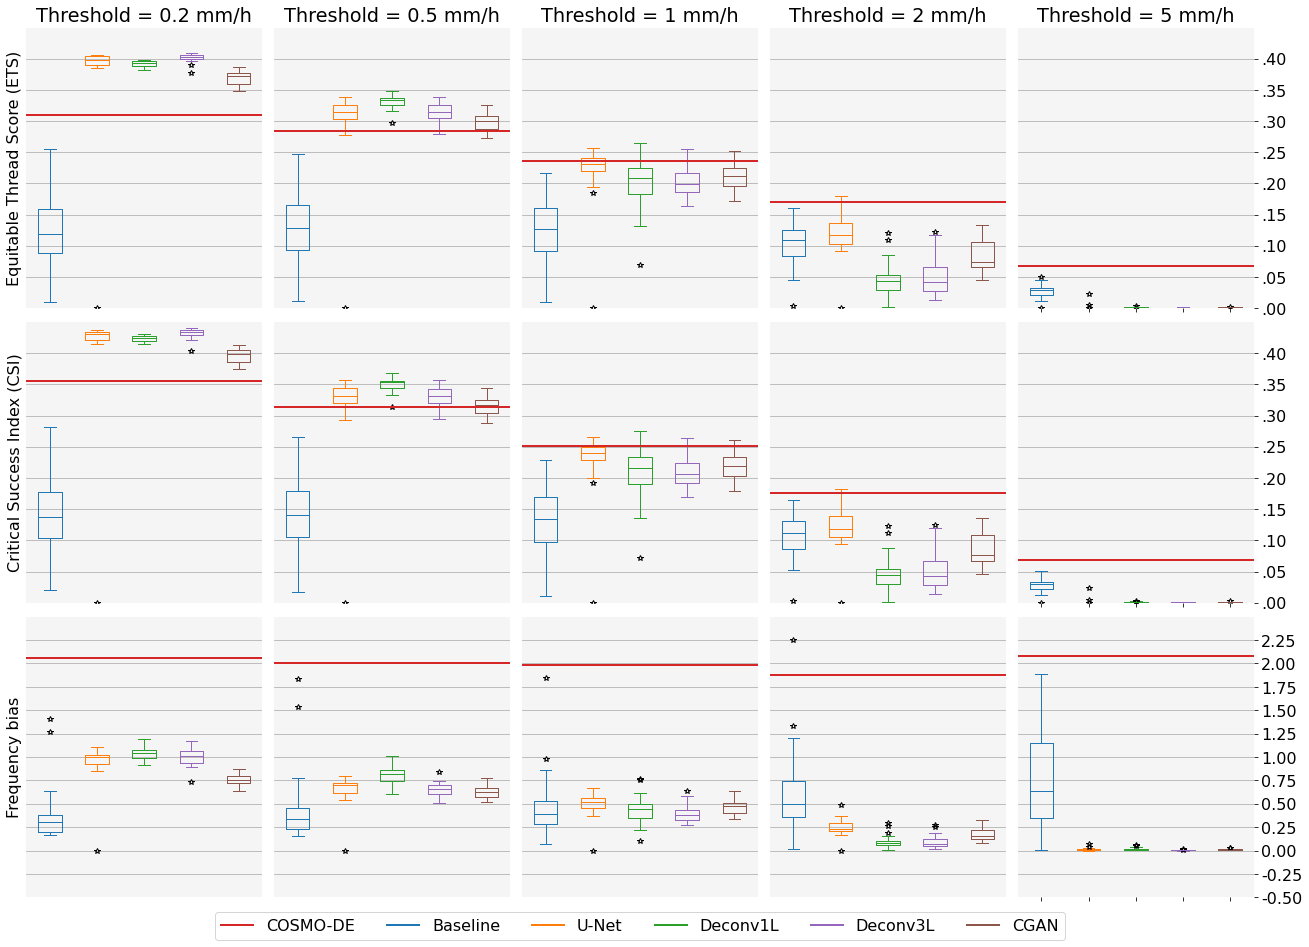

In [11]:
def format_ax(ax, thrs, unit, limits):
 
    data = []

    for d in dirs:
        ## Retrieve model performance
        with open(path + d + '/results.json') as json_file:
            
            a = json.load(json_file)
            u = []

            for r in np.arange(20):
                u.append(a[str(r)][unit][thrs])
            data.append(u)
                
        with open(path +'/results_cosmo.json') as json_file_cosmo:
            cosmo = json.load(json_file_cosmo)[unit][thrs]
            
    data = np.array(data)
    
    b = ax.boxplot(data.T, flierprops={'marker':'*'})

    for i in range(data.shape[0]):
        set_color_boxplot(b, [i], colors[i])
   
    ax.yaxis.grid(True)
    ax.set_facecolor('whitesmoke')
    
    ticks = np.arange(limits[0], limits[1], .05)
    ticks_labels = ['{:.2f}'.format(t)[1:] for t in ticks]
    
    if unit == 'lor':
        ticks = np.arange(limits[0], limits[1], 1)
        ticks_labels = [str(t) for t in ticks]
        
    if unit == 'freqbias':
        ticks = np.arange(limits[0], limits[1], .25)
        ticks_labels = ['{:.2f}'.format(t) for t in ticks]
        
    ax.set_ylim(limits)
    ax.set_yticks(ticks)
    ax.yaxis.set_ticklabels(ticks_labels)
    ax.yaxis.tick_right()
    ax.set_xticklabels([])
    ax.axhline(y=cosmo, linewidth=2, color='tab:red')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    return ax

plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(nrows=3, ncols=5, figsize = (22, 16))

## ETS
ets_limit = [0, .45]
ax[0][0].set_ylabel('Equitable Thread Score (ETS)')
ax[0][0] = format_ax(ax[0][0], '0.2', 'ets', ets_limit)
ax[0][1] = format_ax(ax[0][1], '0.5', 'ets', ets_limit)
ax[0][2] = format_ax(ax[0][2], '1',   'ets', ets_limit)
ax[0][3] = format_ax(ax[0][3], '2',   'ets', ets_limit)
ax[0][4] = format_ax(ax[0][4], '5',   'ets', ets_limit)

## CSI
csi_limit = [0,.45]
ax[1][0].set_ylabel('Critical Success Index (CSI)')
ax[1][0] = format_ax(ax[1][0],'0.2', 'csi', csi_limit)
ax[1][1] = format_ax(ax[1][1],'0.5', 'csi', csi_limit)
ax[1][2] = format_ax(ax[1][2],'1', 'csi', csi_limit)
ax[1][3] = format_ax(ax[1][3],'2', 'csi', csi_limit)
ax[1][4] = format_ax(ax[1][4],'5', 'csi', csi_limit)

## Frequency bias
freqbias_limit = [0,2.50]
freqbias_limit = [-0.5 ,2.50]
freqbias_ticks = np.arange(freqbias_limit[0], freqbias_limit[1], .25)
ax[2][0].set_ylabel('Frequency bias')
ax[2][0] = format_ax(ax[2][0], '0.2', 'freqbias', freqbias_limit)
ax[2][1] = format_ax(ax[2][1], '0.5', 'freqbias', freqbias_limit)
ax[2][2] = format_ax(ax[2][2], '1', 'freqbias', freqbias_limit)
ax[2][3] = format_ax(ax[2][3], '2', 'freqbias', freqbias_limit)
ax[2][4] = format_ax(ax[2][4], '5', 'freqbias', freqbias_limit)


for i in range(3):
    for j in range(4):
        ax[i][j].yaxis.set_ticklabels([])
        ax[i][j].tick_params(axis='both', which='both', length=0)


ax[0][0].set_title('Threshold = 0.2 mm/h')
ax[0][1].set_title('Threshold = 0.5 mm/h')
ax[0][2].set_title('Threshold = 1 mm/h')
ax[0][3].set_title('Threshold = 2 mm/h')
ax[0][4].set_title('Threshold = 5 mm/h')


lines = [matplotlib.lines.Line2D([0], [0], color='tab:red', linewidth=2),
         matplotlib.lines.Line2D([0], [0], color=colors[0], linewidth=2),
         matplotlib.lines.Line2D([0], [0], color=colors[1], linewidth=2),
         matplotlib.lines.Line2D([0], [0], color=colors[2], linewidth=2),
         matplotlib.lines.Line2D([0], [0], color=colors[3], linewidth=2),
         matplotlib.lines.Line2D([0], [0], color=colors[4], linewidth=2)]

labels = ['COSMO-DE'] + names

print(labels)
ax[2][2].legend(lines, labels, bbox_to_anchor=(.5, -.18), loc='lower center', ncol=len(labels), fancybox=True)

fig.show()

plt.subplots_adjust(wspace=.05, hspace=.05)
fig.savefig('DichotomousResults.pdf')

## Eyeball verification

In [7]:
unit = 'leps'
data = []

for d in dirs:
    ## Retrieve model performance
    with open(path + d + '/results.json') as json_file:

        a = json.load(json_file)
        u = []

        for r in np.arange(20):
            u.append(a[str(r)][unit])
        data.append(u)

data = np.array(data)
best_models = np.argmin(data, axis=1)
print('Best models according to', unit, '=', best_models)

Best models according to leps = [ 6  8 13  2  3]


In [8]:
### Load predictions and storage them in dicctionary
predictions = {}

### Include cosmo predictions
predictions['cosmo'] = np.load('/p/scratch/deepacf/deeprain/rojascampos1/data/radar_enhancement/lres/01_tst_c.npy')

### Load predictions from dirs
for idx, d  in enumerate(dirs):
    print(idx, d)
    
    pr = np.load(path + d + '/predictions.npy') ### Load all predictions
    pr = pr[best_models[idx]] ## Picking predictions of best model

    if d == 'augmentation_past':
        pr = np.insert(pr, 0, np.zeros([72,72]) , axis=0)

    predictions[d] = pr
    
    
### Include real y
predictions['real_y'] = np.load('/p/scratch/deepacf/deeprain/rojascampos1/data/radar_enhancement/hres/01_tst_y.npy')

### Include time information
predictions['time'] = np.load('/p/scratch/deepacf/deeprain/rojascampos1/data/radar_enhancement/hres/01_tst_t.npy')

print(predictions.keys())

0 simplest
1 unet2
2 simple
3 augmentation
4 cgans_100
dict_keys(['cosmo', 'simplest', 'unet2', 'simple', 'augmentation', 'cgans_100', 'real_y', 'time'])


[333, 699, 1012, 2437, 832]
['cosmo', 'simplest', 'unet2', 'simple', 'augmentation', 'cgans_100', 'real_y']


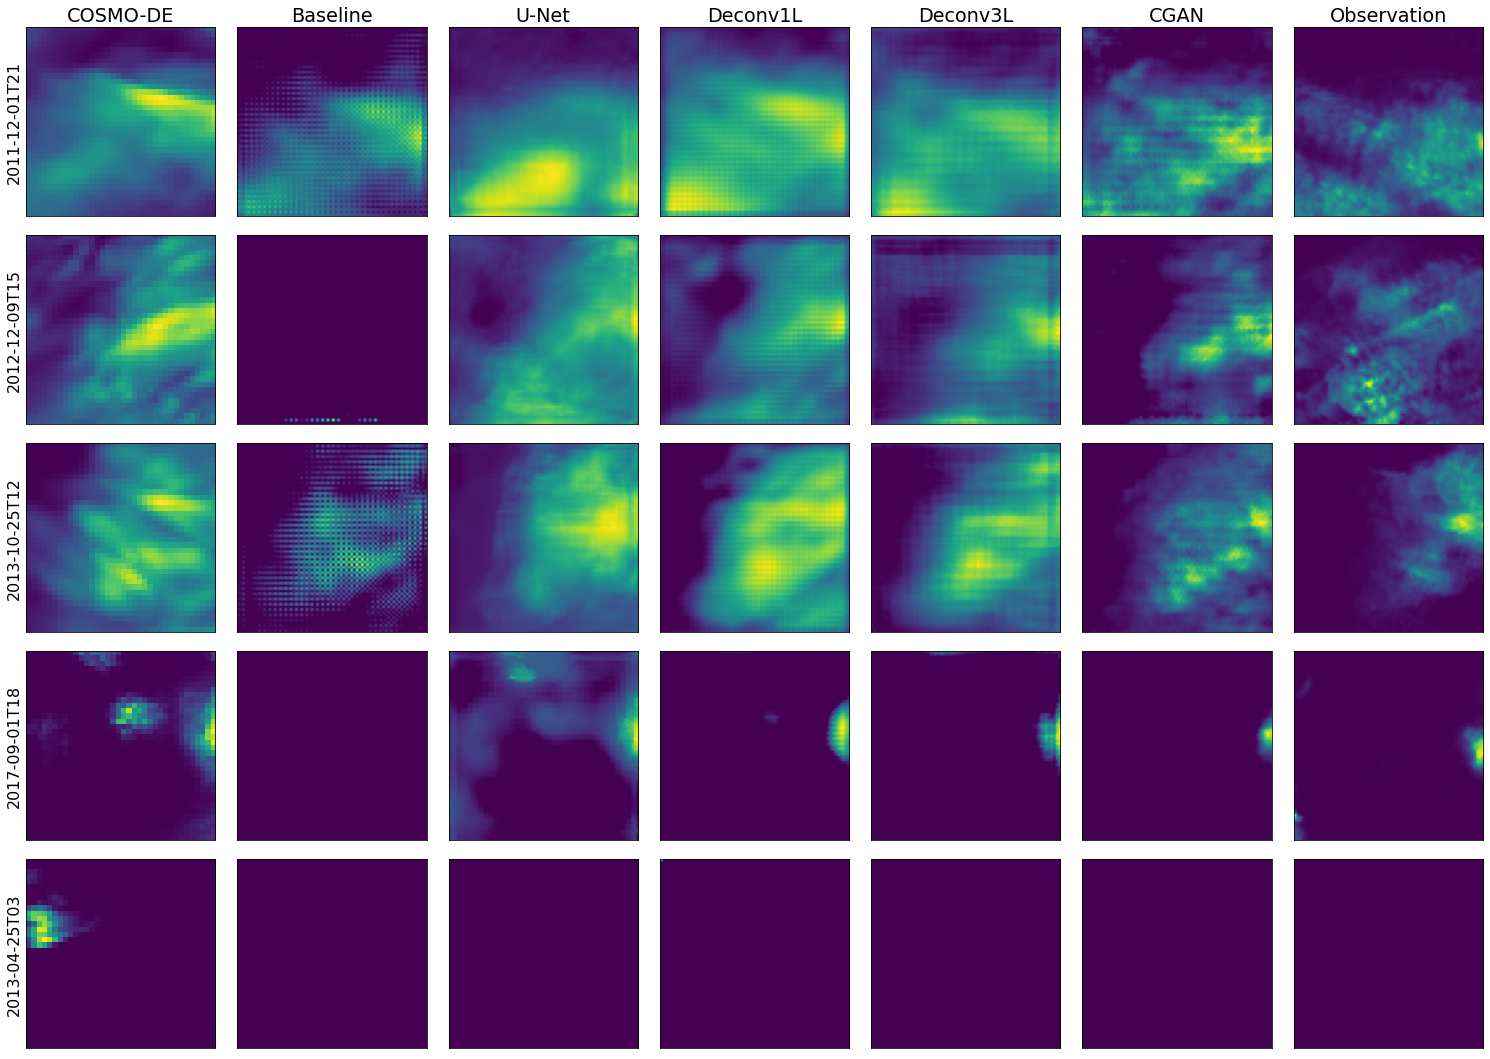

In [9]:
## Pick timsteps to show
idx_to_show = [333, 699, 1012, 2437, 832]

cmap = matplotlib.cm.viridis
fig, ax = plt.subplots(len(idx_to_show), len(predictions.keys())-1, figsize=((len(predictions.keys())-1)*3,len(idx_to_show)*3))

pred_keys = list(predictions.keys())[:-1]
print(pred_keys)

labels = ['COSMO-DE'] + names + ['Observation']

for i, idx in enumerate(idx_to_show):
    
    ax[i,0].set_ylabel(str(predictions['time'][idx])[0:13])
    
    for k, kdx in enumerate(pred_keys):

        ax[0, k].set_title(labels[k])
        ax[i, k].imshow(predictions[kdx][idx], cmap=cmap)
        ax[i, k].set_xticks([])
        ax[i, k].set_yticks([])
        
    
fig.tight_layout()
fig.show()
plt.subplots_adjust(wspace=0.1, hspace=.1)
fig.savefig('examples.pdf')